In [1]:
%matplotlib inline
from matplotlib.ticker import FuncFormatter
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
input_csv = '../../data/mock/agency_performance_dashboard_level1.csv'
df = pd.read_csv(input_csv)
df['Formatted Amount'] = df['Amount'].map('${:,.2f}'.format)

In [3]:
colors = {
    'Accounts Payable': '#579cd0',
    'Accounts Receivable': '#f17c40',
    'Asset Management': '#a5a5a5',
    'Assurance & Audit': '#579cd0',
    'Budgeting': '#ffbf3f',
    'Communications & Media': '#f17c40',
    'Contact Centres': '#a5a5a5',
    'Contract Management & Procurement': '#4373bf',
    'Credit Card Management': '#6aad55',
    'Employee Relations': '#579cd0',
    'Financial Policy & Advice': '#215f8d',
    'Financial Reporting': '#a1471c',
    'Fleet Management': '#ffbf3f',
    'HR Policy & Advice': '#f17c40',
    'HR Reporting & Analysis': '#a5a5a5',
    'HR Strategy & Planning': '#ffbf3f',
    'Information Management': '#4373bf',
    'Learning & Development': '#4373bf',
    'Ledger Management': '#636363',
    'Legal Services': '#6aad55',
    'Parliamentary Services': '#215f8d',
    'Pay & Conditions': '#6aad55',
    'Property Services': '#a1471c',
    'Recruitment': '#215f8d',
    'Taxation': '#9a7222',
    'Travel': '#254575',
    'Treasury': '#3f6833'
}

df['Color'] = df['Category'].apply(lambda x: colors[x])

df.head()

,Group,Category,Amount,Formatted Amount,Color
0,Corporate Services,Assurance & Audit,2696399.79,"$2,696,399.79",#579cd0
1,Corporate Services,Communications & Media,1863256.77,"$1,863,256.77",#f17c40
2,Corporate Services,Contact Centres,864632.70,"$864,632.70",#a5a5a5
3,Corporate Services,Fleet Management,341968.76,"$341,968.76",#ffbf3f
4,Corporate Services,Information Management,2711118.08,"$2,711,118.08",#4373bf


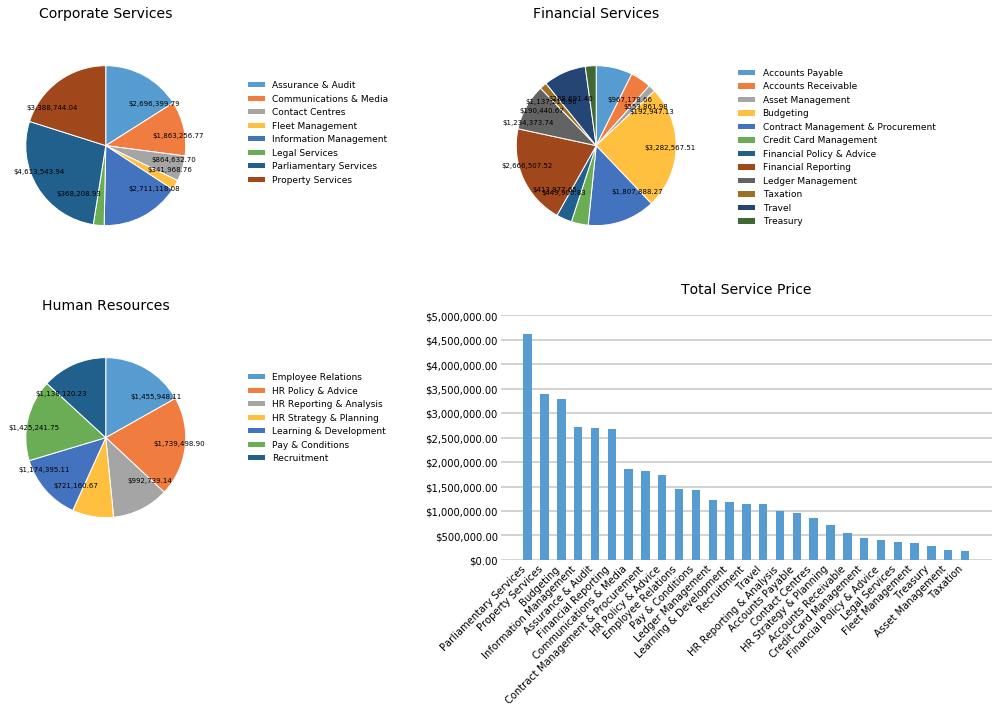

In [4]:
# Initialize figure and axes
fig = plt.figure(figsize=(14,10))
gs = gridspec.GridSpec(2, 5, width_ratios=[6,4,6,1,3])
ax1 = fig.add_subplot(gs[0, 0:1])
ax2 = fig.add_subplot(gs[1, 0:1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 2:])

attrs = dict(counterclock=False, startangle=90, labeldistance=0.6, radius=1)

ax1.axis('equal')
sdf = df[df['Group'] == 'Corporate Services Functions']
sdf = sdf.sort_values('Category')
patches, texts = ax1.pie(sdf['Amount'], labels=sdf['Formatted Amount'], colors=sdf['Color'], **attrs)
for text in texts:
    text.set_fontsize(7)
for patch in patches:
    patch.set_edgecolor('white')
ax1.set_title('Corporate Services Functions', fontsize=14)
legend = ax1.legend(patches, sdf['Category'], fontsize=9)
legend.get_frame().set_linewidth(0.0)
legend.get_frame().set_facecolor('none')
legend.set_bbox_to_anchor((1.2,0.8))

ax2.axis('equal')
sdf = df[df['Group'] == 'Human Resources']
sdf = sdf.sort_values('Category')
patches, texts = ax2.pie(sdf['Amount'], labels=sdf['Formatted Amount'], colors=sdf['Color'], **attrs)
for text in texts:
    text.set_fontsize(7)
for patch in patches:
    patch.set_edgecolor('white')
ax2.set_title('Human Resources', fontsize=14)
legend = ax2.legend(patches, sdf['Category'], fontsize=9)
legend.get_frame().set_linewidth(0.0)
legend.get_frame().set_facecolor('none')
legend.set_bbox_to_anchor((1.2,0.8))

ax3.axis('equal')
sdf = df[df['Group'] == 'Financial Services Functions']
sdf = sdf.sort_values('Category')
patches, texts = ax3.pie(sdf['Amount'], labels=sdf['Formatted Amount'], colors=sdf['Color'], **attrs)
for text in texts:
    text.set_fontsize(7)
for patch in patches:
    patch.set_edgecolor('white')
ax3.set_title('Financial Services Functions', fontsize=14)
legend = ax3.legend(patches, sdf['Category'], fontsize=9)
legend.get_frame().set_linewidth(0.0)
legend.get_frame().set_facecolor('none')
legend.set_bbox_to_anchor((1.2,0.85))

df = df.sort_values('Amount', ascending=False)
#df = df.ix[0:10,0:]
ax4.bar(range(len(df)), df['Amount'], color='#579cd0', width=0.5, zorder=2)
ax4.set_title('Total Service Price\n', fontsize=14)
ax4.set_xticks(range(len(df)))
ax4.set_yticks(range(0,5000001,500000))
labels = ax4.set_xticklabels(df['Category'], rotation=45)
for label in labels:
    label.set_horizontalalignment('right')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.yaxis.grid(color='lightgray', linewidth=2)
ax4.tick_params(axis='x', which='major', labelsize=10, length=0)
ax4.tick_params(axis='y', which='major', labelsize=10, length=0)
ax4.yaxis.set_major_formatter(FuncFormatter(lambda x,pos: '${:,.2f}'.format(x)))
ax4.set_ylim(0, 5000000)

fig.tight_layout()

# Write to a file
fig.savefig('../../reports/figures/mock/agency_performance_dashboard_level1.pdf', bbox_inches='tight')